# Introduction

## Data Loading and Exploration

Set Up

In [474]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from collections import Counter
from scipy import stats
from scipy.stats import norm

In [475]:
# show all dataframe columns
pd.set_option('display.max_columns', None)
# set matplotlib global settings eg. figsize
plt.rcParams['figure.figsize'] = (8.0, 6.0)

**Column Description Table**
| **Column**                     | **Description**                                                                                                                                                                                                                                                                                                                                                                                                                   |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| hotel                          |                                                                                                                                                                                                H1 = Resort Hotel or H2 = City Hotel                                                                                                                                                                                               |
| is_canceled                    |                                                                                                                                                                                    Value indicating if the booking was canceled (1) or not (0)                                                                                                                                                                                    |
| lead_time                      |                                                                                                                                                              Number of days that elapsed between the entering date of the   booking into the PMS and the arrival date                                                                                                                                                             |
| arrival_date_year              |                                                                                                                                                                                                        Year of arrival date                                                                                                                                                                                                       |
| arrival_date_month             |                                                                                                                                                                                                          Month   of arrival date                                                                                                                                                                                                  |
| arrival_date_week_number       |                                                                                                                                                                                                Week number of year for arrival date                                                                                                                                                                                               |
| arrival_date_day_of_month      |                                                                                                                                                                                                        Day of arrival date                                                                                                                                                                                                        |
| stays_in_weekend_nights        |                                                                                                                                                                  Number of weekend nights (Saturday or Sunday) the guest stayed   or booked to stay at the hotel                                                                                                                                                                  |
| stays_in_week_nights           |                                                                                                                                                                     Number of week nights (Monday to Friday) the guest stayed or   booked to stay at the hotel                                                                                                                                                                    |
| adults                         |                                                                                                                                                                                                          Number of adults                                                                                                                                                                                                         |
| children                       |                                                                                                                                                                                                         Number of children                                                                                                                                                                                                        |
| babies                         |                                                                                                                                                                                                          Number of babies                                                                                                                                                                                                         |
| meal                           |                                                                                  Type of meal booked. Categories are presented in standard   hospitality meal packages: Undefined/SC – no meal package; BB – Bed &   Breakfast; HB – Half board (breakfast and one other meal – usually dinner);   FB – Full board (breakfast, lunch and dinner)                                                                                  |
| country                        |                                                                                                                                                                           Country of origin. Categories are represented in the ISO   3155–3:2013 format                                                                                                                                                                           |
| market_segment                 |                                                                                                                                                          Market segment designation. In categories, the term “TA” means   “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                         |
| distribution_channel           |                                                                                                                                                                   Booking   distribution channel. The term “TA” means “Travel Agents” and “TO” means   “Tour Operators”                                                                                                                                                           |
| is_repeated_guest              |                                                                                                                                                                          Value indicating if the booking name was from a repeated guest   (1) or not (0)                                                                                                                                                                          |
| previous_cancellations         |                                                                                                                                                                   Number of previous bookings that were cancelled by the   customer prior to the current booking                                                                                                                                                                  |
| previous_bookings_not_canceled |                                                                                                                                                                      Number of previous bookings not cancelled by the customer   prior to the current booking                                                                                                                                                                     |
| reserved_room_type             |                                                                                                                                                                   Code of room type reserved. Code is presented instead of   designation for anonymity reasons.                                                                                                                                                                   |
| assigned_room_type             |                                                                              Code for the type of room assigned to the booking. Sometimes   the assigned room type differs from the reserved room type due to hotel   operation reasons (e.g. overbooking) or by customer request. Code is   presented instead of designation for anonymity reasons.                                                                              |
| booking_changes                |                                                                                                                                        Number of changes/amendments made to the booking from the   moment the booking was entered on the PMS until the moment of check-in or   cancellation                                                                                                                                       |
| deposit_type                   |                                                            Indication on if the customer made a deposit to guarantee the   booking. This variable can assume three categories: No Deposit – no deposit   was made; Non Refund – a deposit was made in the value of the total stay   cost; Refundable – a deposit was made with a value under the total cost of   stay.                                                            |
| agent                          |                                                                                                                                                                                       ID of the   travel agency that made the booking                                                                                                                                                                                             |
| company                        |                                                                                                                                       ID of the company/entity that made the booking or responsible   for paying the booking. ID is presented instead of designation for anonymity   reasons                                                                                                                                      |
| days_in_waiting_list           |                                                                                                                                                                    Number of days the booking was in the waiting list before it   was confirmed to the customer                                                                                                                                                                   |
| customer_type                  | Type of booking, assuming one of four categories: Contract -   when the booking has an allotment or other type of contract associated to it;   Group – when the booking is associated to a group; Transient – when the   booking is not part of a group or contract, and is not associated to other   transient booking; Transient-party – when the booking is transient, but is   associated to at least other transient booking |
| adr                            |                                                                                                                                                       Average Daily Rate as defined by dividing the sum of all   lodging transactions by the total number of staying nights                                                                                                                                                       |
| required_car_parking_spaces    |                                                                                                                                                                                       Number of car parking spaces required by the customer                                                                                                                                                                                       |
| total_of_special_requests      |                                                                                                                                                                          Number of special requests made by the customer (e.g. twin bed   or high floor)                                                                                                                                                                          |
| reservation_status             |                                                                                     Reservation last status, assuming one of three categories:   Canceled – booking was canceled by the customer; Check-Out – customer has   checked in but already departed; No-Show – customer did not check-in and did   inform the hotel of the reason why                                                                                    |
| reservation_status_date        |                                                                                                            Date at which the last status was set. This variable can be   used in conjunction with the ReservationStatus to understand when was the   booking canceled or when did the customer checked-out of the hotel                                                                                                           |

In [476]:
#import data
original_df = pd.read_csv('../data/rm_system/my_data.csv')

In [477]:
#quick look into the data
original_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [478]:
#checking dimensions of data
original_df.shape

print(f'There are {original_df.shape[0]} rows and {original_df.shape[1]} columns in the dataset')

There are 119390 rows and 32 columns in the dataset


In [479]:
#Review datatypes and null values
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [480]:
#checking null values
original_df.isnull().sum().loc[lambda x: x>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

**Initial Look at Columns**

| **Time Dependent Columns**       | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|----------------------------------|--------------------|-----------------|----------|----------------------------------------|
| arrival_date_year                | 119390             | 0               | int64    | combine into arrival_date              |
| arrival_date_month               | 119390             | 0               | object   | combine into arrival_date              |
| arrival_date_week_number         | 119390             | 0               | int64    | combine into arrival_date              |
| arrival_date_day_of_month        | 119390             | 0               | int64    | combine into arrival_date              |
| reservation_status_date          | 119390             | 0               | object   | convert to datetime                    |



| **Guest Details Columns**      | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|--------------------------------|--------------------|-----------------|----------|----------------------------------------|
| adults                         | 119390             | 0               | int64    |                                        |
| children                       | 119386             | 4               | float64  | binarize, null = 0                     |
| babies                         | 119390             | 0               | int64    | binarize                               |
| country                        | 118902             | 488             | object   | drop - too many variables              |
| customer_type                  | 119390             | 0               | object   | dummy variables                        |
| is_repeated_guest              | 119390             | 0               | int64    |                                        |
| previous_cancellations         | 119390             | 0               | int64    |                                        |
| previous_bookings_not_canceled | 119390             | 0               | int64    |                                        |



| **Room Reservation Related Columns** | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|--------------------------------------|--------------------|-----------------|----------|----------------------------------------|
| hotel                                | 119390             | 0               | object   | dummy variables                        |
| is_canceled                          | 119390             | 0               | int64    | Target Variable                        |
| lead_time                            | 119390             | 0               | int64    |                                        |
| stays_in_weekend_nights              | 119390             | 0               | int64    |                                        |
| stays_in_week_nights                 | 119390             | 0               | int64    |                                        |
| market_segment                       | 119390             | 0               | object   | dummy variables                        |
| distribution_channel                 | 119390             | 0               | object   | dummy variables                        |
| reserved_room_type                   | 119390             | 0               | object   | drop - too many variables              |
| booking_changes                      | 119390             | 0               | int64    | dummy variables                        |
| deposit_type                         | 119390             | 0               | object   | dummy variables                        |
| agent                                | 103050             | 16340           | float64  | binarize                               |
| company                              | 6797               | 112593          | float64  | binarize                               |
| days_in_waiting_list                 | 119390             | 0               | int64    |                                        |
| adr                                  | 119390             | 0               | float64  |                                        |
| reservation_status                   | 119390             | 0               | object   | dummy variables                        |
| assigned_room_type                   | 119390             | 0               | object   | drop - too many variables              |



| **Reservation Misc Columns** | **Non Null Count** | **Null Values** | **Type** | **Preprocessing Step**                |
|------------------------------|--------------------|-----------------|----------|----------------------------------------|
| meal                         | 119390             | 0               | object   | dummy variables                        |
| required_car_parking_spaces  | 119390             | 0               | int64    |                                        |
| total_of_special_requests    | 119390             | 0               | int64    |                                        |


In [481]:
#Creating copy of original DF before initial cleaning
init_clean_df = original_df.copy()

In [482]:
#checking duplicates
init_clean_df.duplicated().sum()

31994

Identified 31,994 duplicated rows

In [483]:
#Looking into duplicates
init_clean_df[init_clean_df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


Keeping the duplicate rows for a guests made multiple reservations for multiple rooms for the same arrival date.

### Preprocessing Planning

In [484]:
#Create lists for each subset of columns

time_dependent_cols = [
    "arrival_date_year",
    "arrival_date_month",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "reservation_status_date"]

guest_detail_cols = [
    "adults",
    "children",
    "babies",
    "country",
    "customer_type",
    "is_repeated_guest",
    "previous_cancellations",
    "previous_bookings_not_canceled"]

room_res_cols = [
    "hotel",
    "is_canceled",
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "market_segment",
    "distribution_channel",
    "reserved_room_type",
    "booking_changes",
    "deposit_type",
    "agent",
    "company",
    "days_in_waiting_list",
    "adr",
    "reservation_status",
    "assigned_room_type"]

misc_res_cols = [
    "meal",
    "required_car_parking_spaces",
    "total_of_special_requests"]

In [485]:
#Sanity check on subsets
init_clean_df[time_dependent_cols]

#init_clean_df[guest_detail_cols]

#init_clean_df[room_res_cols]

#init_clean_df[misc_res_cols]

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date
0,2015,July,27,1,2015-07-01
1,2015,July,27,1,2015-07-01
2,2015,July,27,1,2015-07-02
3,2015,July,27,1,2015-07-02
4,2015,July,27,1,2015-07-03
...,...,...,...,...,...
119385,2017,August,35,30,2017-09-06
119386,2017,August,35,31,2017-09-07
119387,2017,August,35,31,2017-09-07
119388,2017,August,35,31,2017-09-07


### Time Dependent Columns

#### Cleaning

In [486]:
init_clean_df[time_dependent_cols]

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date
0,2015,July,27,1,2015-07-01
1,2015,July,27,1,2015-07-01
2,2015,July,27,1,2015-07-02
3,2015,July,27,1,2015-07-02
4,2015,July,27,1,2015-07-03
...,...,...,...,...,...
119385,2017,August,35,30,2017-09-06
119386,2017,August,35,31,2017-09-07
119387,2017,August,35,31,2017-09-07
119388,2017,August,35,31,2017-09-07


In [487]:
#convert reservation status date to datetime
init_clean_df['reservation_status_date'] = pd.to_datetime(init_clean_df['reservation_status_date'])

In [488]:
#Convert arrival_date_month to integers
#Create a dictionary to map month names to integers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12}

#Use mapping to convert arrival_date_month to integer
init_clean_df['arrival_date_month'] = init_clean_df['arrival_date_month'].map(month_mapping)

In [489]:
#Create Arrival Date column using by combining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`

#rename columns
init_clean_df.rename(columns={'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'},inplace=True)

init_clean_df['arrival_date']= pd.to_datetime(init_clean_df[['year','month','day']])

In [490]:
#dropping year, month, and day of month columns
init_clean_df.drop(columns=['year','month','day'],inplace=True)

#updating the time dependend column variables with newly converted arrival_date column
time_dependent_cols.remove('arrival_date_year')
time_dependent_cols.remove('arrival_date_month')
time_dependent_cols.remove('arrival_date_day_of_month')
time_dependent_cols.append('arrival_date')


In [491]:
#Sanity check on time dependent columns
init_clean_df[time_dependent_cols]

,arrival_date_week_number,reservation_status_date,arrival_date
0,27,2015-07-01,2015-07-01
1,27,2015-07-01,2015-07-01
2,27,2015-07-02,2015-07-01
3,27,2015-07-02,2015-07-01
4,27,2015-07-03,2015-07-01
...,...,...,...
119385,35,2017-09-06,2017-08-30
119386,35,2017-09-07,2017-08-31
119387,35,2017-09-07,2017-08-31
119388,35,2017-09-07,2017-08-31


In [492]:
init_clean_df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


### Guest Detail Columns

#### Cleaning

In [493]:
#Visualizing guest detail columns
init_clean_df[guest_detail_cols]

,adults,children,babies,country,customer_type,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
0,2,0.0,0,PRT,Transient,0,0,0
1,2,0.0,0,PRT,Transient,0,0,0
2,1,0.0,0,GBR,Transient,0,0,0
3,1,0.0,0,GBR,Transient,0,0,0
4,2,0.0,0,GBR,Transient,0,0,0
...,...,...,...,...,...,...,...,...
119385,2,0.0,0,BEL,Transient,0,0,0
119386,3,0.0,0,FRA,Transient,0,0,0
119387,2,0.0,0,DEU,Transient,0,0,0
119388,2,0.0,0,GBR,Transient,0,0,0


In [494]:
#Checking for nulls
init_clean_df[guest_detail_cols].isnull().sum().loc[lambda x: x>0]

children      4
country     488
dtype: int64

In [495]:
#Checking the number of unique values
init_clean_df[guest_detail_cols].nunique()

adults                             14
children                            5
babies                              5
country                           177
customer_type                       4
is_repeated_guest                   2
previous_cancellations             15
previous_bookings_not_canceled     73
dtype: int64

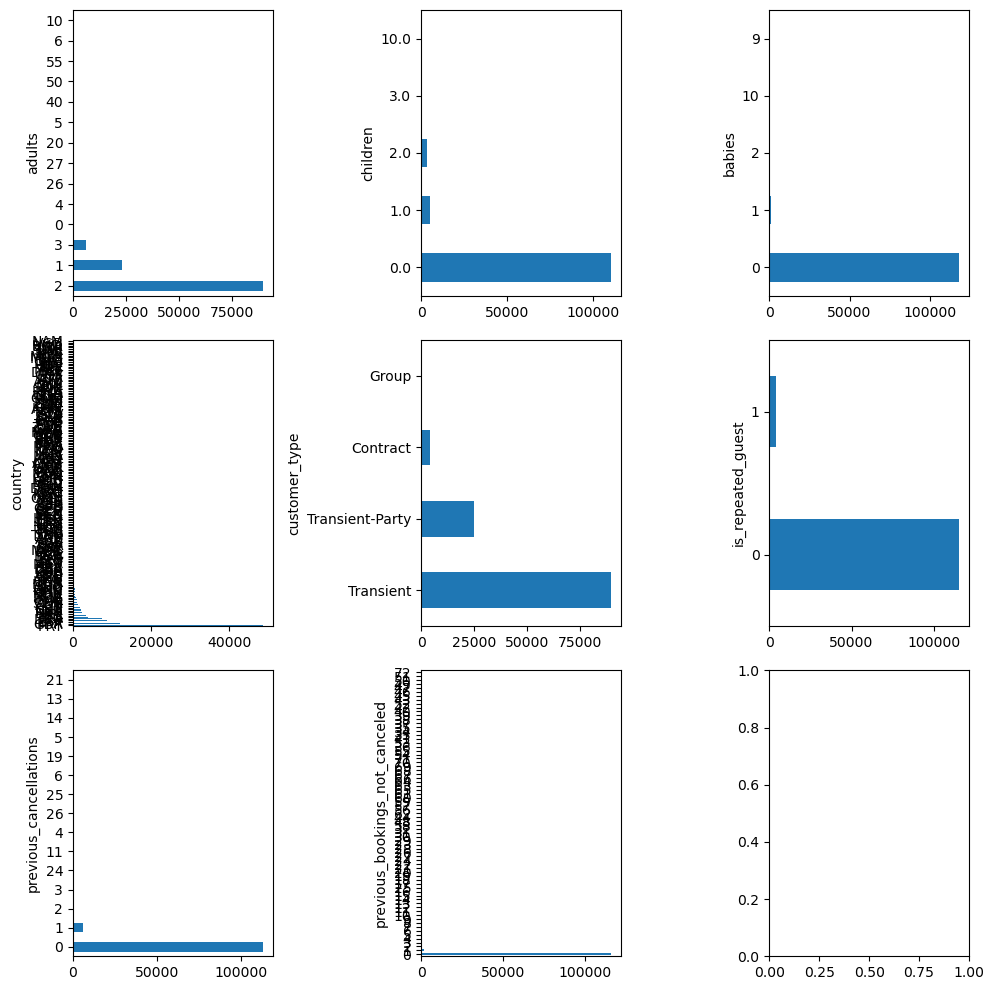

In [496]:
#Creating a value_count plot for each Guest Detail Column

#Specify subplot dimensions
nrows=3
ncols=3

plt.subplots(nrows, ncols, figsize=(10,10))

for i, col in enumerate(init_clean_df[guest_detail_cols]):
    plt.subplot(nrows, ncols, i+1)
    init_clean_df[col].value_counts().plot(kind='barh')

plt.tight_layout()
plt.show()

Action Items for Guest Detail Columns:
1. Drop `country` column because there are too many columns to create dummy variables.
2. Binarize `children` and `babies` columns. Reservations are usually based on the number of `adults` in the room.

In [497]:
#Drop Country column
init_clean_df.drop(columns='country', inplace=True)
guest_detail_cols.remove('country')

In [498]:
#Binarize children and babies columns
init_clean_df['children'] = init_clean_df['children'].where(init_clean_df['children'] <=1 , 1)

init_clean_df['babies'] = init_clean_df['babies'].where(init_clean_df['babies'] <=1 , 1)

Identify clean version of the cleaned Guest Details Columns

In [499]:
#sanity check
init_clean_df[guest_detail_cols]

,adults,children,babies,customer_type,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
0,2,0.0,0,Transient,0,0,0
1,2,0.0,0,Transient,0,0,0
2,1,0.0,0,Transient,0,0,0
3,1,0.0,0,Transient,0,0,0
4,2,0.0,0,Transient,0,0,0
...,...,...,...,...,...,...,...
119385,2,0.0,0,Transient,0,0,0
119386,3,0.0,0,Transient,0,0,0
119387,2,0.0,0,Transient,0,0,0
119388,2,0.0,0,Transient,0,0,0


***

### Misc Reservation Columns

#### Cleaning

In [500]:
#Visualize the miscellaneous reservation columns
init_clean_df[misc_res_cols]

,meal,required_car_parking_spaces,total_of_special_requests
0,BB,0,0
1,BB,0,0
2,BB,0,0
3,BB,0,0
4,BB,0,1
...,...,...,...
119385,BB,0,0
119386,BB,0,2
119387,BB,0,4
119388,BB,0,0


In [501]:
#checking for nulls
init_clean_df[misc_res_cols].isnull().sum().loc[lambda x: x>0]

Series([], dtype: int64)

In [502]:
#checking number of unique values
init_clean_df[misc_res_cols].nunique()

meal                           5
required_car_parking_spaces    5
total_of_special_requests      6
dtype: int64

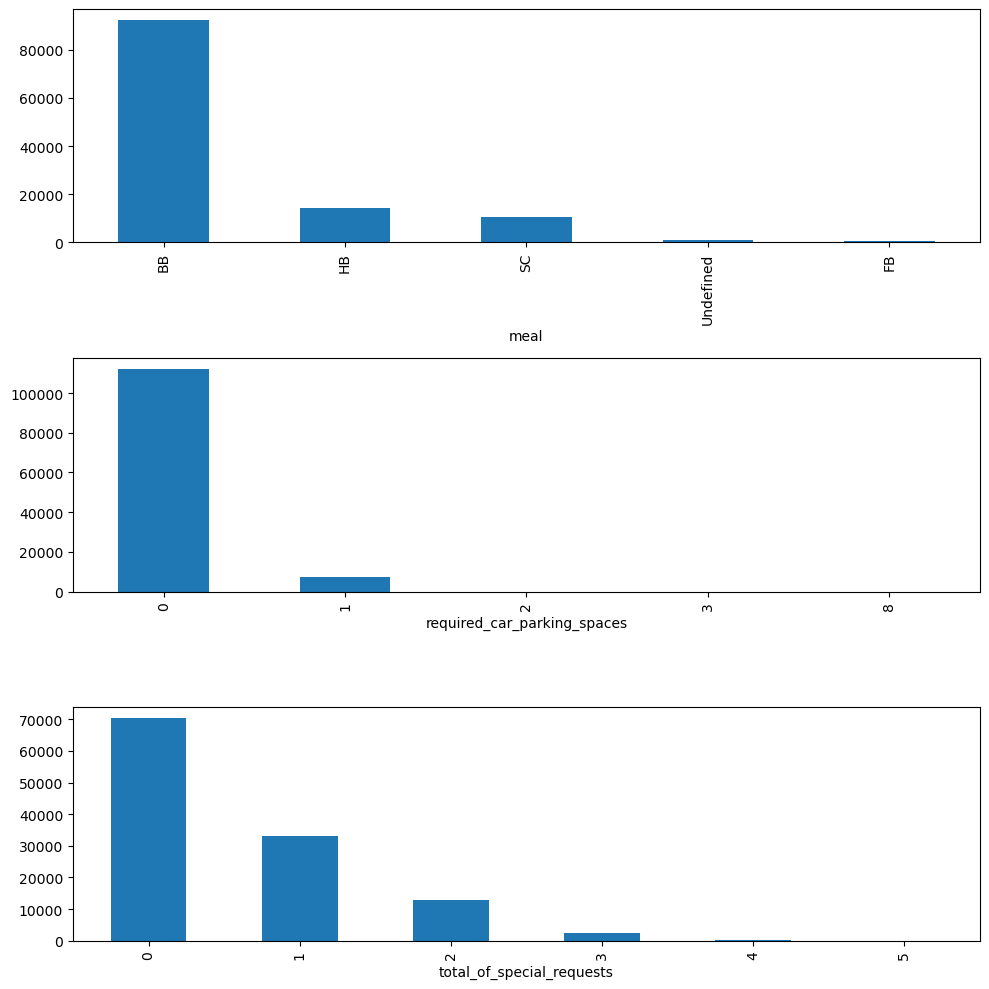

In [503]:
#Creating a value_count plot for each Misc Reservation Columns

#Specify subplot dimensions
nrows=3
ncols=1

plt.subplots(nrows, ncols, figsize=(10,10))

for i, col in enumerate(init_clean_df[misc_res_cols]):
    plt.subplot(nrows, ncols, i+1)
    init_clean_df[col].value_counts().plot(kind='bar')

plt.tight_layout()
plt.show()

In [504]:
init_clean_df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64

Action Items for Misc Reservation Columns:
1. Binarize `required_car_parking_spaces` and `meal` for now instead of dropping to see if there is any correlation to our target variables.

In [505]:
#Binarize meal column
meal_mapping = {'BB': 1, 'HB': 1, 'SC': 1, 'FB' : 1, 'Undefined': 0}

init_clean_df['meal'] = init_clean_df['meal'].map(meal_mapping)

#Binarize required_car_parking_spaces
init_clean_df['required_car_parking_spaces'] = init_clean_df['required_car_parking_spaces'].fillna(0).clip(upper=1)

In [506]:
#Sanity Check
init_clean_df[misc_res_cols]

,meal,required_car_parking_spaces,total_of_special_requests
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,1
...,...,...,...
119385,1,0,0
119386,1,0,2
119387,1,0,4
119388,1,0,0


***

### Room Reservation Columns

#### Cleaning

In [507]:
#Visualize Room Reservation Columns
init_clean_df[room_res_cols]

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,reservation_status,assigned_room_type
0,Resort Hotel,0,342,0,0,Direct,Direct,C,3,No Deposit,NaN,NaN,0,0.00,Check-Out,C
1,Resort Hotel,0,737,0,0,Direct,Direct,C,4,No Deposit,NaN,NaN,0,0.00,Check-Out,C
2,Resort Hotel,0,7,0,1,Direct,Direct,A,0,No Deposit,NaN,NaN,0,75.00,Check-Out,C
3,Resort Hotel,0,13,0,1,Corporate,Corporate,A,0,No Deposit,304.0,NaN,0,75.00,Check-Out,A
4,Resort Hotel,0,14,0,2,Online TA,TA/TO,A,0,No Deposit,240.0,NaN,0,98.00,Check-Out,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,Offline TA/TO,TA/TO,A,0,No Deposit,394.0,NaN,0,96.14,Check-Out,A
119386,City Hotel,0,102,2,5,Online TA,TA/TO,E,0,No Deposit,9.0,NaN,0,225.43,Check-Out,E
119387,City Hotel,0,34,2,5,Online TA,TA/TO,D,0,No Deposit,9.0,NaN,0,157.71,Check-Out,D
119388,City Hotel,0,109,2,5,Online TA,TA/TO,A,0,No Deposit,89.0,NaN,0,104.40,Check-Out,A


In [508]:
#Checking null values
init_clean_df[room_res_cols].isnull().sum().loc[lambda x: x>0]

agent       16340
company    112593
dtype: int64

In [509]:
#Checking number of unique values
init_clean_df[room_res_cols].nunique()

hotel                         2
is_canceled                   2
lead_time                   479
stays_in_weekend_nights      17
stays_in_week_nights         35
market_segment                8
distribution_channel          5
reserved_room_type           10
booking_changes              21
deposit_type                  3
agent                       333
company                     352
days_in_waiting_list        128
adr                        8879
reservation_status            3
assigned_room_type           12
dtype: int64

In [510]:
init_clean_df[room_res_cols].describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,0.221124,86.693382,189.266735,2.321149,101.831122
std,0.482918,106.863097,0.998613,1.908286,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
25%,0.000000,18.000000,0.000000,1.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,0.000000,69.000000,1.000000,2.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,1.000000,160.000000,2.000000,3.000000,0.000000,229.000000,270.000000,0.000000,126.000000
max,1.000000,737.000000,19.000000,50.000000,21.000000,535.000000,543.000000,391.000000,5400.000000


Identified negative `adr` min value

In [511]:
#Checking value counts for all room reservation columns
for col in init_clean_df[room_res_cols]:
    print(f"Column: {col}")
    print(init_clean_df[col].value_counts())
    print("\n")

Column: hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


Column: is_canceled
is_canceled
0    75166
1    44224
Name: count, dtype: int64


Column: lead_time
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64


Column: stays_in_weekend_nights
stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64


Column: stays_in_week_nights
stays_in_week_nights
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5

Action Items for Room Reservation Columns:
1. Impute nulls with 0 and Binarize `agent` and `company`columns.
2. Drop `reserved_room_type` and `assigned_room_type` because they would create too many dummy variables if we kept them.
3. Replace `adr` negatives with 0. ADR cannot be negative. For each reservation sold, they are provided a rate. Comp rooms are $0 and also would not make it negative.

In [512]:
#1. Impute nulls to 0 and Binarize agent and company. Yes = 1, No = 0
init_clean_df['agent'] = init_clean_df['agent'].fillna(0).clip(
    upper=1) #convert any value above 1 to be 1

init_clean_df['company'] = init_clean_df['company'].fillna(0).clip(upper=1)

In [513]:
#Sanity Check for agent column
init_clean_df['agent'].value_counts()

agent
1.0    103050
0.0     16340
Name: count, dtype: int64

In [514]:
#2 drop reserved room type and assigned room types
init_clean_df.drop(columns=['reserved_room_type','assigned_room_type'], inplace=True)

#Remove columns from room reservation columns list
room_res_cols.remove('reserved_room_type')
room_res_cols.remove('assigned_room_type')

In [515]:
#imputing any negative ADR to 0
init_clean_df[init_clean_df['adr'] < 0] = 0

In [516]:
#sanity check, min is now 0 and not negative
init_clean_df['adr'].describe()

count    119390.000000
mean        101.831175
std          50.535679
min           0.000000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [517]:
#Sanity Check
init_clean_df[room_res_cols]

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,reservation_status
0,Resort Hotel,0,342,0,0,Direct,Direct,3,No Deposit,0.0,0.0,0,0.00,Check-Out
1,Resort Hotel,0,737,0,0,Direct,Direct,4,No Deposit,0.0,0.0,0,0.00,Check-Out
2,Resort Hotel,0,7,0,1,Direct,Direct,0,No Deposit,0.0,0.0,0,75.00,Check-Out
3,Resort Hotel,0,13,0,1,Corporate,Corporate,0,No Deposit,1.0,0.0,0,75.00,Check-Out
4,Resort Hotel,0,14,0,2,Online TA,TA/TO,0,No Deposit,1.0,0.0,0,98.00,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,Offline TA/TO,TA/TO,0,No Deposit,1.0,0.0,0,96.14,Check-Out
119386,City Hotel,0,102,2,5,Online TA,TA/TO,0,No Deposit,1.0,0.0,0,225.43,Check-Out
119387,City Hotel,0,34,2,5,Online TA,TA/TO,0,No Deposit,1.0,0.0,0,157.71,Check-Out
119388,City Hotel,0,109,2,5,Online TA,TA/TO,0,No Deposit,1.0,0.0,0,104.40,Check-Out


In [518]:
#Dtype recheck
init_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  int64  
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

In [519]:
#Convert children, agent, and company to INT data types
init_clean_df['children']= init_clean_df['children'].astype(int)

init_clean_df['agent']= init_clean_df['agent'].astype(int)

init_clean_df['company']= init_clean_df['company'].astype(int)

In [520]:
#sanity check
init_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  int64  
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  int64  
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_gues

In [521]:
init_clean_df.head() #What caused reservation_status_date and arrival_date to have all the seconds? It didnt have that the last time I ran it above..

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0,0,1,Direct,Direct,0,0,0,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00,2015-07-01 00:00:00
1,Resort Hotel,0,737,27,0,0,2,0,0,1,Direct,Direct,0,0,0,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00,2015-07-01 00:00:00
2,Resort Hotel,0,7,27,0,1,1,0,0,1,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00,2015-07-01 00:00:00
3,Resort Hotel,0,13,27,0,1,1,0,0,1,Corporate,Corporate,0,0,0,0,No Deposit,1,0,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00,2015-07-01 00:00:00
4,Resort Hotel,0,14,27,0,2,2,0,0,1,Online TA,TA/TO,0,0,0,0,No Deposit,1,0,0,Transient,98.0,0,1,Check-Out,2015-07-03 00:00:00,2015-07-01 00:00:00


In [558]:
#Create cleaned hotel dataframe for EDA
hotel_clean_df = init_clean_df.copy()
hotel_clean_df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0,0,1,Direct,Direct,0,0,0,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00,2015-07-01 00:00:00
1,Resort Hotel,0,737,27,0,0,2,0,0,1,Direct,Direct,0,0,0,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01 00:00:00,2015-07-01 00:00:00
2,Resort Hotel,0,7,27,0,1,1,0,0,1,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00,2015-07-01 00:00:00
3,Resort Hotel,0,13,27,0,1,1,0,0,1,Corporate,Corporate,0,0,0,0,No Deposit,1,0,0,Transient,75.0,0,0,Check-Out,2015-07-02 00:00:00,2015-07-01 00:00:00
4,Resort Hotel,0,14,27,0,2,2,0,0,1,Online TA,TA/TO,0,0,0,0,No Deposit,1,0,0,Transient,98.0,0,1,Check-Out,2015-07-03 00:00:00,2015-07-01 00:00:00


In [559]:
#Attempt to fix the Type Error that occurs below- convert back to datetime
#hotel_clean_df['arrival_date']= pd.to_datetime(hotel_clean_df['arrival_date'])
#hotel_clean_df['reservation_status_date']= pd.to_datetime(hotel_clean_df['reservation_status_date'])

In [560]:
hotel_clean_df['arrival_date']

0         2015-07-01 00:00:00
1         2015-07-01 00:00:00
2         2015-07-01 00:00:00
3         2015-07-01 00:00:00
4         2015-07-01 00:00:00
                 ...         
119385    2017-08-30 00:00:00
119386    2017-08-31 00:00:00
119387    2017-08-31 00:00:00
119388    2017-08-31 00:00:00
119389    2017-08-29 00:00:00
Name: arrival_date, Length: 119390, dtype: object

In [561]:
#Creating missing target variable

#value counts of arrival_date
day_demand_counts = hotel_clean_df['arrival_date'].value_counts()

#Creating day_demand target variable
hotel_clean_df['day_demand'] = hotel_clean_df['arrival_date'].map(day_demand_counts)
hotel_clean_df['day_demand']

0         122
1         122
2         122
3         122
4         122
         ... 
119385     89
119386    134
119387    134
119388    134
119389    125
Name: day_demand, Length: 119390, dtype: int64

In [562]:
hotel_clean_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
day_demand                  

***

## EDA

In [563]:
# GOal: df where each row is a date, and the value is the total bookings 
#df2-> each row is a date and the value is total cancelations 


# --? Visualize as a line plot

### Time series for demand over time

In [564]:
#creating DF for demand
demand_ts_df = hotel_clean_df[['arrival_date','day_demand']].drop_duplicates()
demand_ts_df

,arrival_date,day_demand
0,2015-07-01 00:00:00,122
33,2015-07-02 00:00:00,93
65,2015-07-03 00:00:00,56
100,2015-07-04 00:00:00,88
131,2015-07-05 00:00:00,53
...,...,...
14969,0,1
18512,2015-11-22 00:00:00,38
20336,2016-01-24 00:00:00,36
21683,2016-03-06 00:00:00,67


In [565]:
demand_ts_df.set_index('arrival_date',inplace=True)

In [566]:
#Checking for missing values
demand_ts_df.isna().sum()

day_demand    0
dtype: int64

In [567]:
#Make sure we dont have duplicates in our DF
demand_ts_df.index.is_unique

True

#### Checking for missing days in the dataframe:

In [568]:
# Extract first and last days
first_day = demand_ts_df.index.min()
last_day = demand_ts_df.index.max()

# Count how many days are in our dataset
actual_days = len(demand_ts_df)

# Check how many days we expect to see between our first and last record
expected_days = last_day - first_day + pd.Timedelta(days=1)
expected_days  # this is a Timedelta object

TypeError: '<=' not supported between instances of 'Timestamp' and 'int'

In [ ]:
print(f'Our dataset ranges from {first_day.date()} to {last_day.date()}')
print(f'In that range we expect to see {expected_days.days} days')
print(f'Our dataset has records from {actual_days} days')
print(f'There are {expected_days.days-actual_days} days missing')

Our dataset ranges from 1970-01-01 to 2017-08-31
In that range we expect to see 17410 days
Our dataset has records from 794 days
There are 16616 days missing


In [ ]:
#DF for plotting
demand_over_time = hotel_clean_df.groupby('arrival_date').size() #provides the count of elements by arrival_date

#plot this, do this for cxls -extract cancels and take the sum


In [ ]:
#Plotting demand over time
fig = px.line(demand_over_time, width=1000, height=500, title='Demand over time by Arrival Date')
fig.update_layout(showlegend=False, yaxis_title='Bookings', xaxis_title='Date')

In [ ]:
#Resampling the plot to add clarity
demand_ot_week = demand_over_time.resample('W').mean()

#Plotting demand over time

fig = px.line(demand_ot_week, width=1000, height=500, title='Demand over time by Week of Year')
fig.update_layout(showlegend=False, yaxis_title='Bookings', xaxis_title='Date')

The line plot above shows some seasonality. The number of bookings reach a peak in the month of October and decline to a valley in January.  Bookings increase again in April.  There is only 2 years of data in this dataset, but this seems to be a start of a trend.

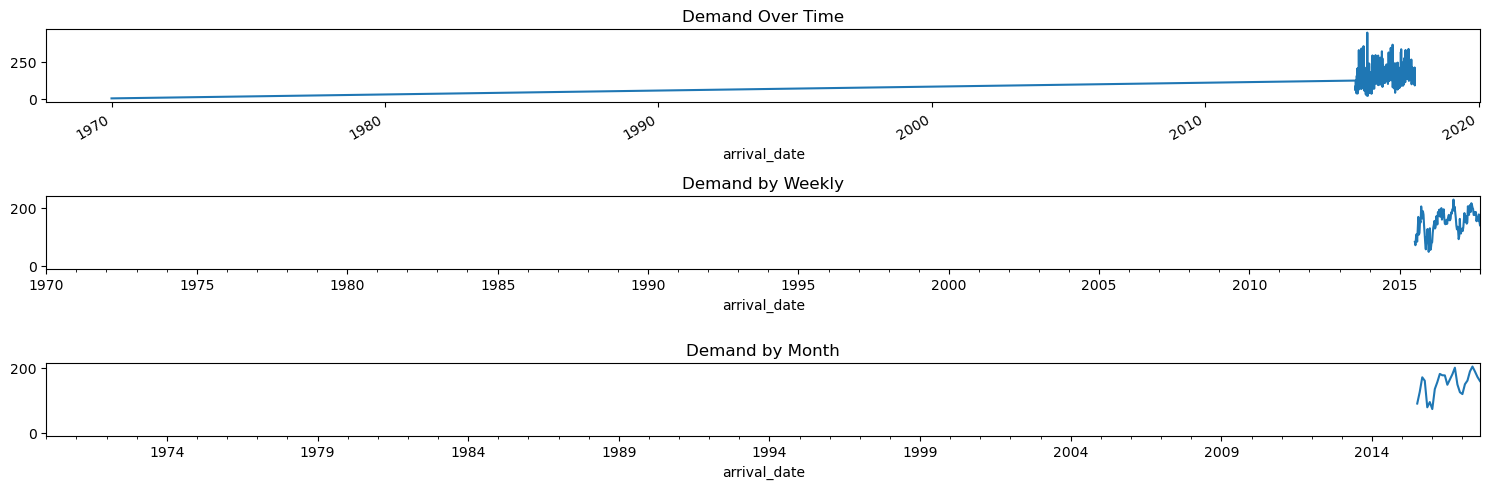

In [ ]:
# Dont need?
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))

demand_over_time.plot(ax=ax[0], title='Demand Over Time')
demand_over_time.resample('W').mean().plot(ax=ax[1], title='Demand by Weekly')
demand_over_time.resample('MS').mean().plot(ax=ax[2], title='Demand by Month')

plt.tight_layout()

plt.show()

### Time series for Cancellation over time

In [ ]:
hotel_clean_df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [ ]:
cxl_ts_df = hotel_clean_df[['arrival_date','is_canceled']]
cxl_ts_df

,arrival_date,is_canceled
0,2015-07-01,0
1,2015-07-01,0
2,2015-07-01,0
3,2015-07-01,0
4,2015-07-01,0
...,...,...
119385,2017-08-30,0
119386,2017-08-31,0
119387,2017-08-31,0
119388,2017-08-31,0


In [ ]:
#cxl_ts_df.groupby('arrival_date')['is_canceled'].sum().reset_index

In [ ]:
#cxl_ts_df.set_index('arrival_date',inplace=True)

In [ ]:
cxl_ts_df.value_counts()

arrival_date  is_canceled
2015-12-05    0              255
2016-11-07    1              235
2017-05-19    1              225
2015-10-16    1              222
2016-06-24    0              220
                            ... 
2015-12-16    1                2
2015-11-22    1                2
2016-01-11    1                1
2015-10-27    1                1
1970-01-01    0                1
Name: count, Length: 1587, dtype: int64

In [ ]:
cxl_ts_df.groupby('arrival_date')['is_canceled'].sum()

arrival_date
1970-01-01     0
2015-07-01    19
2015-07-02    57
2015-07-03    19
2015-07-04    43
              ..
2017-08-27    49
2017-08-28    64
2017-08-29    44
2017-08-30    27
2017-08-31    45
Name: is_canceled, Length: 794, dtype: int64

In [ ]:
cancellations_over_time = hotel_clean_df.groupby('is_canceled').size() #provides the count of elements by is cancelled

#plot this, do this for cxls -extract cancels and take the sum

### City Hotel vs. Resort Hotel

In [ ]:
#Create 2 variables to compare City Hotel vs Resort Hotel
city_hotel = hotel_clean_df[hotel_clean_df['hotel']=='City Hotel']
resort_hotel = hotel_clean_df[hotel_clean_df['hotel']=='Resort Hotel']

In [ ]:
city_rows = city_hotel.shape[0]
resort_rows = resort_hotel.shape[0]

print(f' The City Hotel has {city_rows} reservations in this dataset.')
print(f' The Resort Hotel has {resort_rows} reservations in this dataset.')

 The City Hotel has 79330 reservations in this dataset.
 The Resort Hotel has 40059 reservations in this dataset.


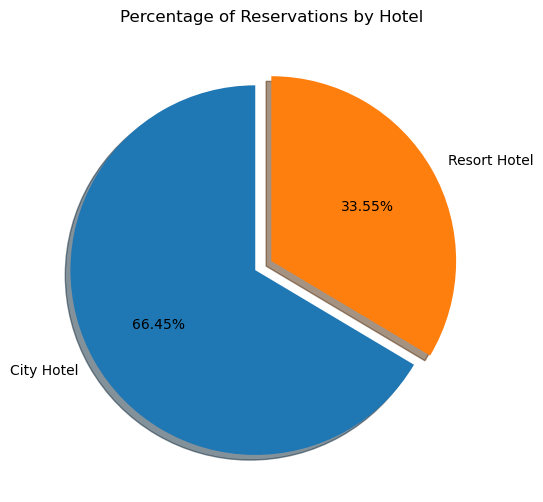

In [ ]:
#Plot pie plot of total reservations between city and resort hotels
hotel_labels = 'City Hotel', 'Resort Hotel'
hotel_sizes = [city_rows, resort_rows]
explode = (0.1,0)

fig, ax = plt.subplots()

ax.pie(hotel_sizes, 
       labels=hotel_labels,
       explode=explode,
       autopct='%1.2f%%', #show 2 percentage points
       shadow=True,
       startangle=90      
)
plt.title('Percentage of Reservations by Hotel')
plt.show()

## Ideas for Next Steps

### Dummy Variables

#### Dummy Variables for Guest Detail Columns:
1. Create dummy variables for `customer_type` 
2. Drop `Group` as the reference column

In [ ]:
#Create dummy variables for guest detail columns
#guest_dummy_df = pd.get_dummies(init_clean_df[guest_detail_cols])
#guest_dummy_df

In [ ]:
#Drop reference column customer type Group
#guest_dummy_df.drop(columns='customer_type_Group', inplace=True)

In [ ]:
#Print guest dummy df
#guest_dummy_df.head()

#### Dummy variables for Room Reservation Columns

Create dummy variables for `hotel`, `market_segment`, `distribution_channel`, `deposit_type`, `reservation_status`

In [ ]:
#Create dummy variables for market
#room_res_dummy_df = pd.get_dummies(init_clean_df[room_res_cols])

In [ ]:
#Drop Reference columns for new dummy variables
#reference_cols = ['market_segment_Aviation','distribution_channel_GDS','deposit_type_Refundable','reservation_status_No-Show']

#room_res_dummy_df.drop(columns=reference_cols, inplace=True)

In [ ]:
#room_res_dummy_df

In [ ]:
#hotel_clean_df = pd.concat([room_res_dummy_df, guest_dummy_df, init_clean_df[time_dependent_cols],init_clean_df[misc_res_cols]],axis=1)
#hotel_clean_df

#### Combine dummy variables with the cleaned version
- init_clean_df[time_dependent_cols]
- guest_dummy_df
- init_clean_df[misc_res_cols]
- room_res_dummy_df

### Splitting up the DF into a city/resort dataframe:

In [ ]:
#Create city hotel df
#city_hotel_df = hotel_clean_df[hotel_clean_df['hotel_City Hotel']== True]

#Create resort hotel df
#resort_hotel_df = hotel_clean_df[hotel_clean_df['hotel_Resort Hotel']== True]